In [4]:
import numpy as np
import os
from matplotlib import pyplot as plt
import matplotlib.image as img
import pandas as pd
import statistics
from PIL import Image

In [35]:
wfData = os.listdir("Dataset/train/wildfire")
nwfData = os.listdir("Dataset/train/nowildfire")
wfDataSize = []
nwfDataSize = []
wfDupDict = dict()
nwfDupDict = dict()
duplicates = []


for i in wfData:
    wfDataSize.append(int(os.path.getsize("Dataset/train/wildfire/" + i)/1000))

for i in nwfData:
    nwfDataSize.append(int(os.path.getsize("Dataset/train/nowildfire/" + i)/1000))



In [36]:
#Checking for duplicates

for i in wfData:
    try: 
        imgdata = img.imread("Dataset/train/wildfire/" + i)
        if str(imgdata) in wfDupDict.keys():
            wfDupDict[str(imgdata)] += 1
            duplicates.append(str(imgdata))
            print("WF Dup found")
        else:
            wfDupDict[str(imgdata)] = 1
    except: 
        print("error")

for i in nwfData:
    try:
        imgdata = img.imread("Dataset/train/nowildfire/" + i)
        if str(imgdata) in nwfDupDict.keys():
            nwfDupDict[str(imgdata)] += 1
            duplicates.append(str(imgdata))
            print("NWF Dup Found")
        else:
            nwfDupDict[str(imgdata)] = 1
    except:
        nwfData.remove(i)
        print("error in nwfDupDict")


print("Number of Duplicates: " + str(len(duplicates)))

error in nwfDupDict
NWF Dup Found
NWF Dup Found
NWF Dup Found
NWF Dup Found
NWF Dup Found
NWF Dup Found
NWF Dup Found
NWF Dup Found
NWF Dup Found
NWF Dup Found
NWF Dup Found
NWF Dup Found
NWF Dup Found
NWF Dup Found
NWF Dup Found
NWF Dup Found
NWF Dup Found
NWF Dup Found
NWF Dup Found
NWF Dup Found
NWF Dup Found
NWF Dup Found
NWF Dup Found
NWF Dup Found
NWF Dup Found
NWF Dup Found
NWF Dup Found
NWF Dup Found
Number of Duplicates: 28


In [37]:

#Functions for calculating the statistics

def Stats(data, x, path):
    differences = []
    data.sort()
    mean = statistics.mean(data)
    median = statistics.median(data)
    maximum = max(data)
    minimum = min(data)
    dataRange = (maximum - minimum)
    firstQuantile = np.quantile(data, .25)
    thirdQuantile = np.quantile(data, .75)
    iqr = thirdQuantile - firstQuantile
    lower_bound = firstQuantile - (1.5 * iqr)
    upper_bound = thirdQuantile + (1.5 * iqr)
    outliers_belowLowerBound = [x for x in data if x <= lower_bound]
    outliers_aboveUpperBound = [x for x in data if x >= upper_bound]
    outliers = outliers_belowLowerBound + outliers_aboveUpperBound

    for i in x:
        if int(os.path.getsize(path + i)/1000) not in outliers:
            differences.append(i)

    
    

    betMinMed = len(data[:data.index(median)])
    betMedMax = len(data[data.index(median):])

    print("Range = " + str(dataRange))
    print("IQR = " + str(iqr))
    print("Mean = " + str(mean))
    print("Data between min and median = " + str(betMinMed))    
    print("Data between median and max = " + str(betMedMax))  
    print("min = " + str(minimum) + "  Q1 = " + str(firstQuantile) + "  median = " + str(median) + "  Q3 = " + str(thirdQuantile) + "  max = " + str(maximum))
    print("lowerBound = " + str(lower_bound))
    print("upperBound = " + str(upper_bound))
    print("Outliers = " + str(len(outliers_aboveUpperBound) + len(outliers_belowLowerBound)))
    
    
    plt.boxplot(data)
    plt.show()

  
    
    return(differences)
   



      
    
    
    

Range = 68
IQR = 9.0
Mean = 32.48679365079365
Data between min and median = 7564
Data between median and max = 8186
min = 2  Q1 = 28.0  median = 33.0  Q3 = 37.0  max = 70
lowerBound = 14.5
upperBound = 50.5
Outliers = 202


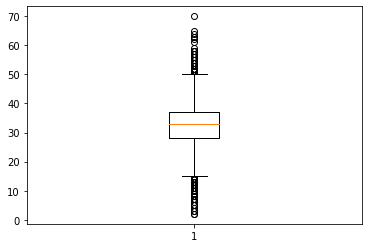



Range = 59
IQR = 13.0
Mean = 39.23586206896552
Data between min and median = 7004
Data between median and max = 7496
min = 2  Q1 = 34.0  median = 42.0  Q3 = 47.0  max = 61
lowerBound = 14.5
upperBound = 66.5
Outliers = 381


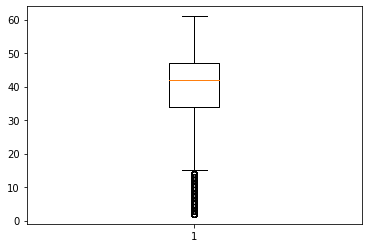

In [38]:
processedWfData = Stats(wfDataSize, wfData, "Dataset/train/wildfire/")
print("")
print("")
processedNwfData = Stats(nwfDataSize, nwfData, "Dataset/train/nowildfire/")


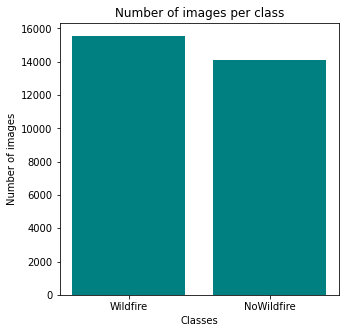

WF data:  15548
NWF data:  14119


In [39]:
def plotBar():
    classes = ["Wildfire", "NoWildfire"]
    values = [len(processedWfData), len(processedNwfData)]


    fig = plt.figure(figsize = (5, 5))
    
    # creating the bar plot
    plt.bar(classes, values, color ='teal',
            width = 0.8)
    
    plt.xlabel("Classes")
    plt.ylabel("Number of images")
    plt.title("Number of images per class")
    plt.show()
    print("WF data: ", len(processedWfData))
    print("NWF data: ", len(processedNwfData))

plotBar()

In [40]:
imagePaths = []
imageLabels = []

for i in processedWfData:
    imagePaths.append("Dataset/train/wildfire/" + i)
    imageLabels.append(0)

for i in processedNwfData:
    imagePaths.append("Dataset/train/nowildfire/" + i)
    imageLabels.append(1)

finalDF = pd.DataFrame()
finalDF['images'] = [i for i in imagePaths]
finalDF['labels'] = [i for i in imageLabels]

finalDF.to_csv('WildfireData.csv')

In [5]:
loaded_df = pd.read_csv('WildfireData.csv')
print(len(loaded_df))


29667


Wildfire Prone Areas: 


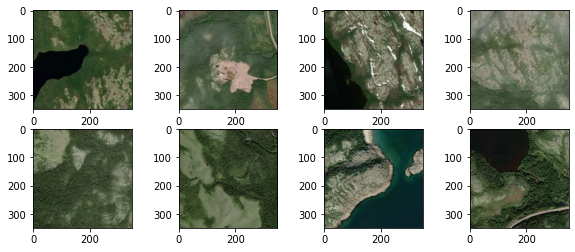

In [6]:
loaded_wfData = loaded_df[loaded_df["labels"] == 0]
loaded_nwfData = loaded_df[loaded_df["labels"] == 1]



print("Wildfire Prone Areas: ")
fig = plt.figure(figsize=(10, 4))
columns = 4
rows = 2
for i in range(1, columns*rows +1):
    wfImage = img.imread(loaded_wfData["images"][i])
    fig.add_subplot(rows, columns, i)
    plt.imshow(wfImage)
plt.show()



Wildfire Safe Areas: 


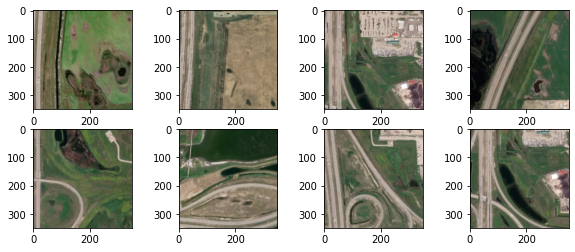

: 

In [43]:

print("Wildfire Safe Areas: ")
fig = plt.figure(figsize=(10, 4))
columns = 4
rows = 2
for i in range(1, columns*rows +1):
    nwfImage = img.imread(loaded_nwfData["images"][15548+i])
    fig.add_subplot(rows, columns, i)
    plt.imshow(nwfImage)
plt.show()

In [9]:
traindataX = []
traindataY = []

for i in loaded_df['images']:
    image = img.imread(i)
    traindataX.append(image)

for i in loaded_df['labels']:
    traindataY.append(i)



In [15]:
validationdataX = []
validationdataY = []
validationWFdata = os.listdir("Dataset/test/wildfire")
validationNWFdata = os.listdir("Dataset/test/nowildfire")

for i in validationWFdata:
    try: 
        image = img.imread("Dataset/test/wildfire/"+i)
        validationdataX.append(image)
        validationdataY.append(0)
    except:
        print("error")

for i in validationNWFdata:
    try: 
        image = img.imread("Dataset/test/nowildfire/"+i)
        validationdataX.append(image)
        validationdataY.append(1)
    except:
        print("error")

error


In [17]:
print(len(validationdataX))
print(len(validationdataY))

6299
6299


In [10]:
print(len(traindataX))
print(len(traindataY))

29667
29667


In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, models, layers


In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=(350, 350, 3)))
model.add(layers.MaxPool2D(32, (2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(2))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 348, 348, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 159, 159, 32)     0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 808992)            0         
                                                                 
 dense (Dense)               (None, 32)                25887776  
                                                                 
 dense_1 (Dense)             (None, 2)                 66        
                                                                 
Total params: 25,888,738
Trainable params: 25,888,738
Non-trainable params: 0
__________________________________________

In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(traindataX, traindataY, epochs=2, 
                    validation_data=(validationdataX, validationdataY))

ValueError: Failed to find data adapter that can handle input: (<class 'list'> containing values of types {"<class 'numpy.ndarray'>"}), (<class 'list'> containing values of types {"<class 'int'>"})

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)